# 学习目标
- 了解matplotlib
- 掌握matplotlib


In [27]:
# 导入Pandas包
import pandas as pd

# 导入matplotlib包
import matplotlib.pyplot as plt

# 设置正常显示汉字和负号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

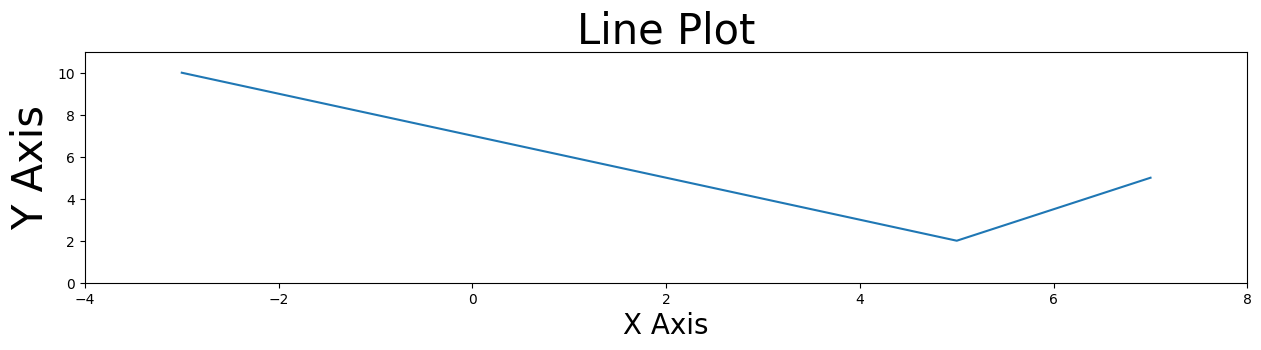

In [2]:
# Matplotlib 状态接口作图

# 1、创建数据
x = [-3, 5, 7]
y = [10, 2, 5]

# 2、创建画布,指定画布大小15*3
plt.figure(figsize=(15, 3))

# 3、绘制x，y坐标
plt.plot(x, y)

# 4、设置x，y轴坐标范围
plt.xlim(-4, 8)
plt.ylim(0, 11)

# 5、设置x，y轴标签和字体大小
plt.xlabel('X Axis', size=20)
plt.ylabel('Y Axis', size=30)

# 5、设置标题内容和字体大小
plt.title('Line Plot', size=30)

# 6、展示
plt.show()

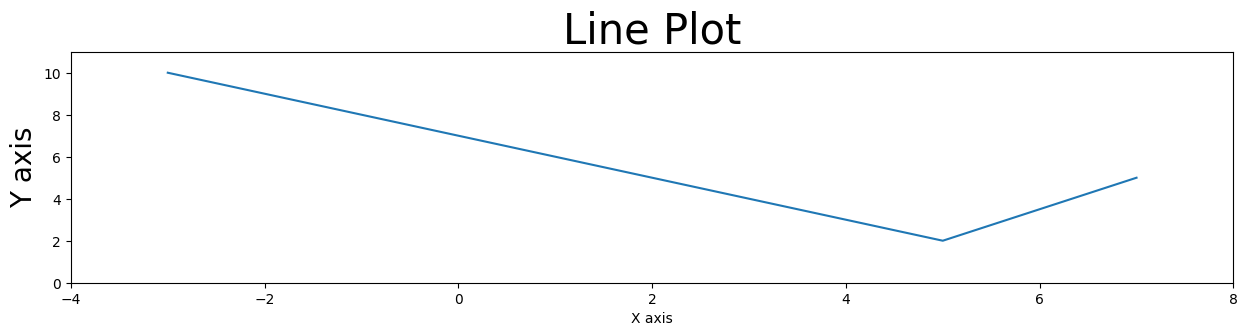

In [3]:
# Matplotlib面向对象作图

# 1、创建一个画布，尺寸是15*3
fig, ax = plt.subplots(figsize=(15, 3))

# 2、绘制坐标
ax.plot(x, y)

# 3、设置x,y轴坐标范围和标签
ax.set_xlim(-4, 8)
ax.set_ylim(0, 11)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis', size=20)

# 4、设置标题和字体大小
ax.set_title('Line Plot', size=30)

# 5、展示
plt.show()

In [10]:
def choice_data_set(data_frame, param):
    """
    选择DataFrame对象子集
    :param data_frame: 
    :param param: 
    :return: 
    """
    return data_frame[param == data_frame['dataset']]

In [11]:
# 1、加载数据
anscombe = pd.read_csv('../data/anscombe.csv')

# 2、展示数据中dataset列，用来区分整个数据中子数据集
dataset_1 = choice_data_set(anscombe, 'I')
print(dataset_1.describe())

dataset_2 = choice_data_set(anscombe, 'II')
print(dataset_2.describe())

dataset_3 = choice_data_set(anscombe, 'III')
print(dataset_3.describe())

dataset_4 = choice_data_set(anscombe, 'IV')
print(dataset_4.describe())


               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

Text(0.5, 1.0, 'dataset_4')

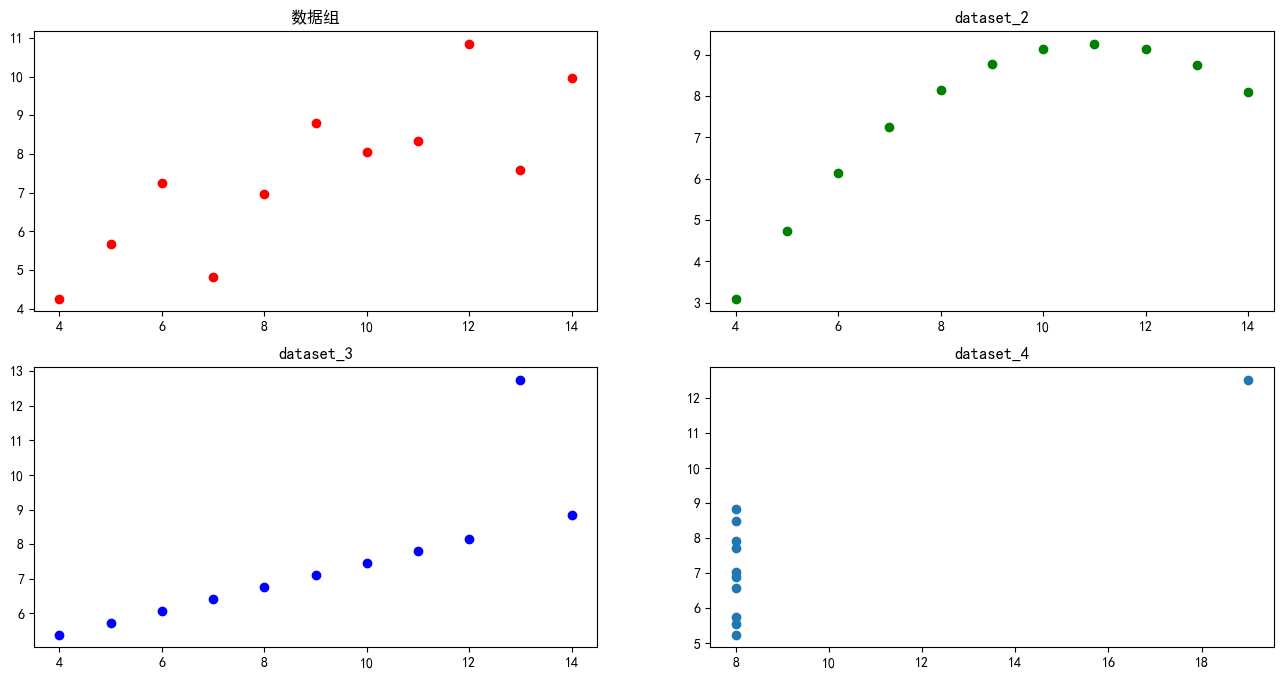

In [29]:
# 1、创建一个画布,尺寸是16*8
fig = plt.figure(figsize=(16, 8))

# 2、向画布添加一个两行两列的子图
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# 3、绘制坐标中图表
axes1.plot(dataset_1['x'], dataset_1['y'], 'ro')
axes2.plot(dataset_2['x'], dataset_2['y'], 'go')
axes3.plot(dataset_3['x'], dataset_3['y'], 'bo')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 4、子图添加标题
axes1.set_title('数据组')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')


In [31]:
# 1、加载tips数据集合
tips = pd.read_csv('../data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'freq')

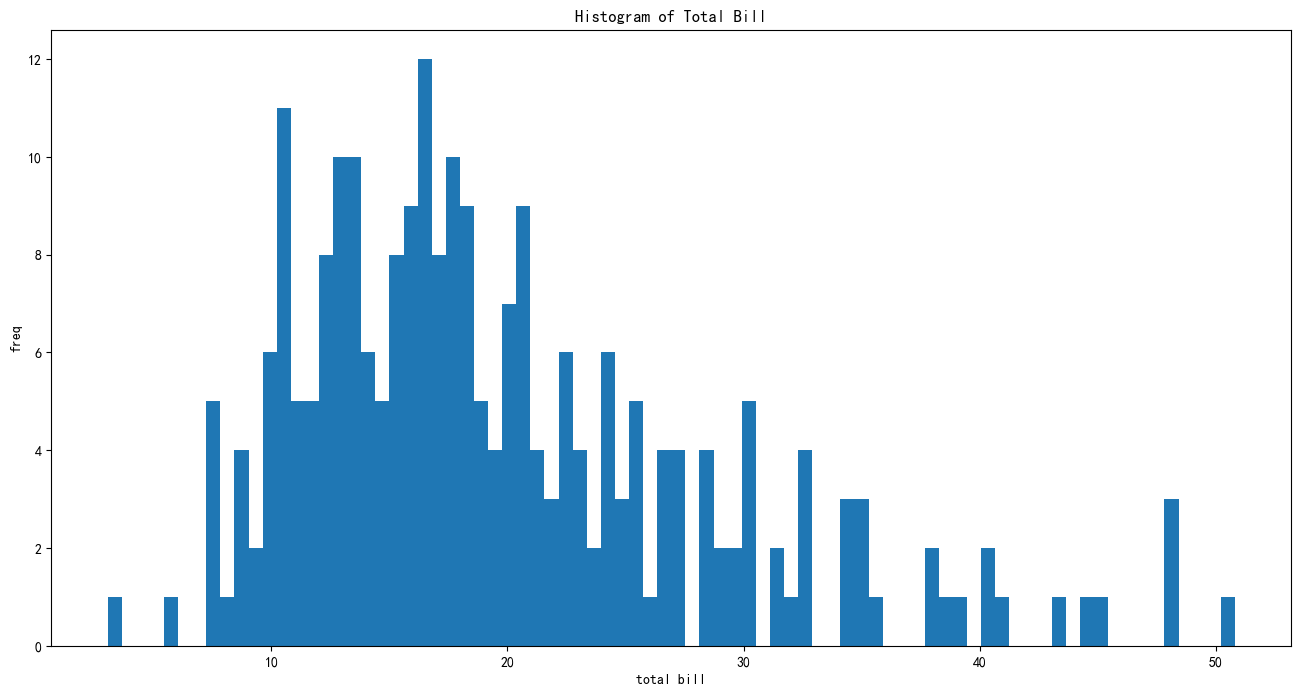

In [56]:
# 1、创建一个画布
fig = plt.figure(figsize=(16, 8))

# 2、向画布添加一个一行一列的子坐标轴
axes1 = fig.add_subplot(1, 1, 1)

# 3、绘制一个直方图
axes1.hist(tips['total_bill'], bins = 80)

# 4、设置图标、x、y坐标标题
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('total bill')
axes1.set_ylabel('freq')

Text(0, 0.5, 'Y轴')

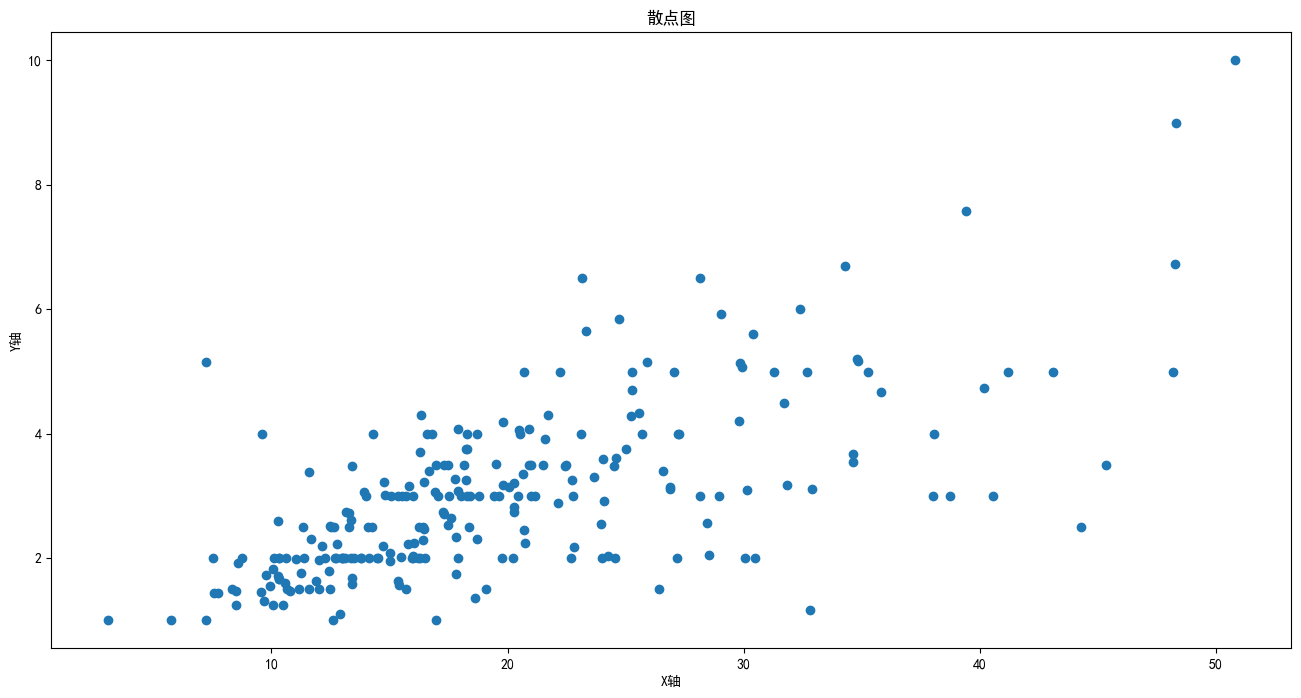

In [60]:
# 散点图-双变量（bivariate)指两个变量

# 1、创建一个画布
fig = plt.figure(figsize=(16, 8))

# 2、添加一个子图
axes1 = fig.add_subplot(1, 1, 1)

# 3、创建一个散点图
axes1.scatter(tips['total_bill'], tips['tip'])

# 4、设置图、x、y轴标题
axes1.set_title('散点图')
axes1.set_xlabel('X轴')
axes1.set_ylabel('Y轴')


In [61]:
# 多变量数据
#   - 二维平面可以用来展示两个变量的数据，如果是多变量，比如添加一个性别变量，可以通过不同的颜色来表示
#   - 还可以通过圆点的大小来区分变量的不同，但如果变量的大小区别不大，可能通过圆点大小来区分效果不是很好

In [63]:
def recorde_sex(sex_str):
    """
    性别转码
    :param sex_str: 
    :return: 
    """
    if 'Female' == sex_str:
        return 0
    else : 
        return 1

Text(0, 0.5, '小费')

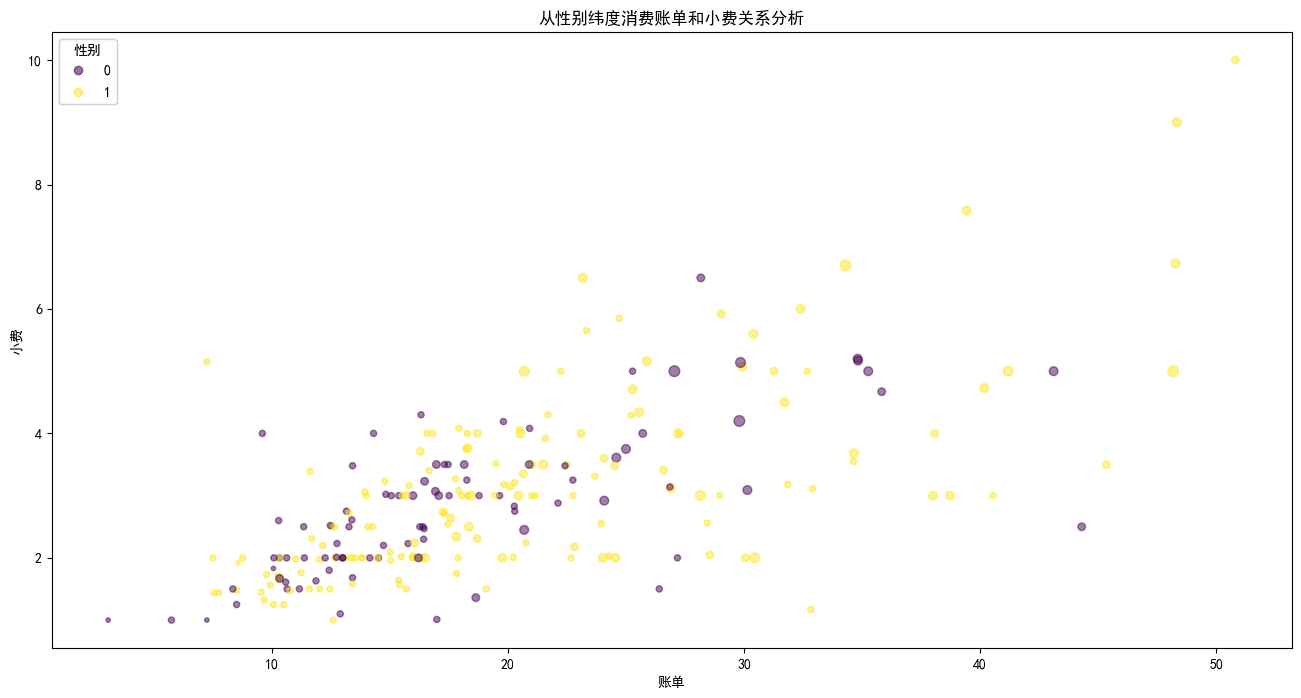

In [70]:
# 1、使用自定义函数对性别转换
tips['sex_color'] = tips['sex'].apply(recorde_sex)

# 2、创建一个画布
fig = plt.figure(figsize=(16, 8))

# 3、添加一个子图
axes1 = fig.add_subplot(1, 1, 1)

# 4、绘制一个散点图，并设置x、y轴数据，设置点大小、颜色、透明度
# x，y：长度相同的数组，也就是我们即将绘制散点图的数据点，输入数据。
# s：点的大小，默认 20，也可以是个数组，数组每个参数为对应点的大小。
# c：点的颜色，默认蓝色 'b'，也可以是个 RGB 或 RGBA 二维行数组。
# marker：点的样式，默认小圆圈 'o'。
# alpha：：透明度设置，0-1 之间，默认 None，即不透明
scatter = axes1.scatter(x = tips['total_bill'], y = tips['tip'], s = tips['size']*10, c=tips['sex_color'], alpha = 0.5)

# 5、设置并添加图例
legend1 = axes1.legend(*scatter.legend_elements(), loc = 'upper left', title = '性别')
axes1.add_artist(legend1)

# 6、设置图标、x轴、y轴标题
axes1.set_title('从性别纬度消费账单和小费关系分析')
axes1.set_xlabel('账单')
axes1.set_ylabel('小费')


In [71]:
# 小结
# 1、Python常用绘图库
# 2、Matplotlib，Pandas，Seaborn，pyecharts等
# 3、Matplotlib绘图步骤
# 4、导入Matplotlib.pyplot
# 5、准备数据
# 6、创建图表，坐标轴
# 7、绘制图表
# 8、设置标题，x，y轴标